---
title: Time Series Analysis
subtitle: Foundations of Statistical Analysis in Python
abstract: As the name implies, this notebook is all about **Time Series Analysis**. A time series is a series of data points recorded at different time-intervals. The time series analysis means analyzing the time series data using various statistical tools and techniques. 
author:
  - name: Karol Flisikowski
    affiliations: 
      - Gdansk University of Technology
      - Chongqing Technology and Business University
    orcid: 0000-0002-4160-1297
    email: karol@ctbu.edu.cn
date: 2025-06-05
---

## **Time-Series**

- A **time-series** data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals.  The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.


- **Time-Series Forecasting** is the process of using a statistical model to predict future values of a time-series based on past results.


- A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.


- Applications of time series are used in statistics, finance or business applications. A very common example of time series data is the daily closing value of the stock index like NASDAQ or Dow Jones. Other common applications of time series are sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.



## **Components of a Time-Series**


- **Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).


- **Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.


- **Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.


- **Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.


- **ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.

# **Types of data** 

As stated above, the time series analysis is the statistical analysis of the time series data. A time series data means that data is recorded at different time periods or intervals. The time series data may be of three types:-


1 **Time series data** - The observations of the values of a variable recorded at different points in time is called time series data. 


2 **Cross sectional data** - It is the data of one or more variables recorded at the same point in time.


3 **Pooled data**- It is the combination of time series data and cross sectional data.


# **Time Series terminology** 

There are various terms and concepts in time series that we should know. These are as follows:

1	**Dependence**- It refers to the association of two observations of the same variable at prior time periods.


2	**Stationarity**- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.


3	**Differencing**- Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.


4	**Specification** - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models. 


5	**Exponential Smoothing** - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value.  It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term prediction.


6	**Curve fitting** - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.


7	**ARIMA** - ARIMA stands for Auto Regressive Integrated Moving Average.


# **Time Series Analysis**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization

In [2]:
# Plot settings
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
%matplotlib inline

## Basic plots

For time series data, the obvious graph to start with is a time plot.
That is, the observations are plotted against the time of observation,
with consecutive observations joined by straight lines.

In [3]:
path = 'data/AirPassengers.csv'
df = pd.read_csv(path)
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


- We should rename the column names.

In [4]:
df.columns = ['Date','Number of Passengers']

df.head()

,Date,Number of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Number of Passengers'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Date'

<Figure size 1440x720 with 0 Axes>

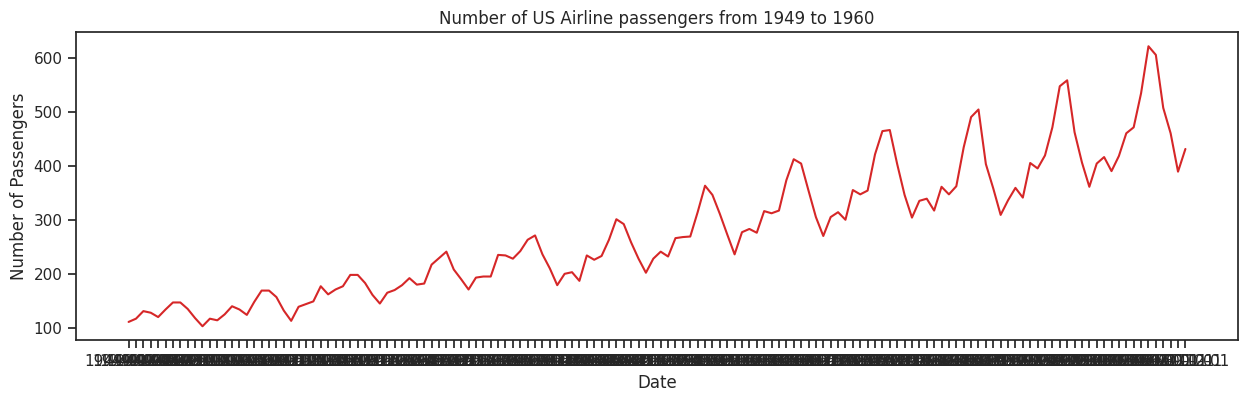

In [6]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Number of US Airline passengers from 1949 to 1960')

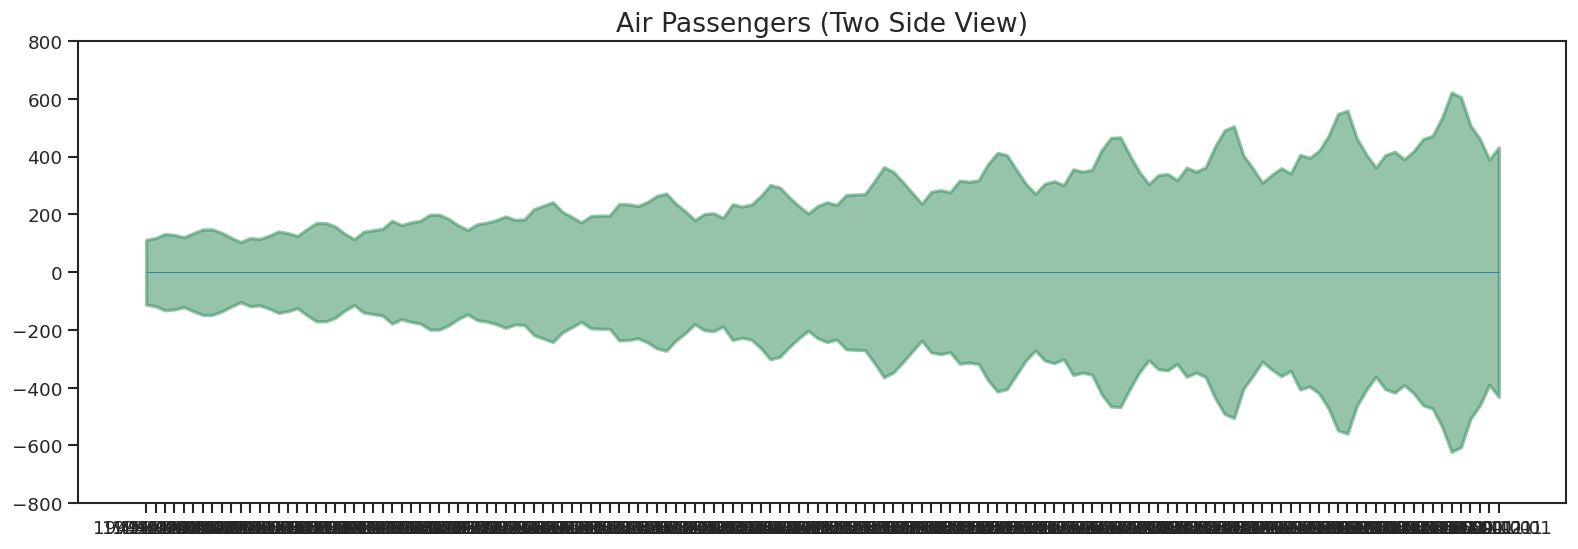

In [7]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

- It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

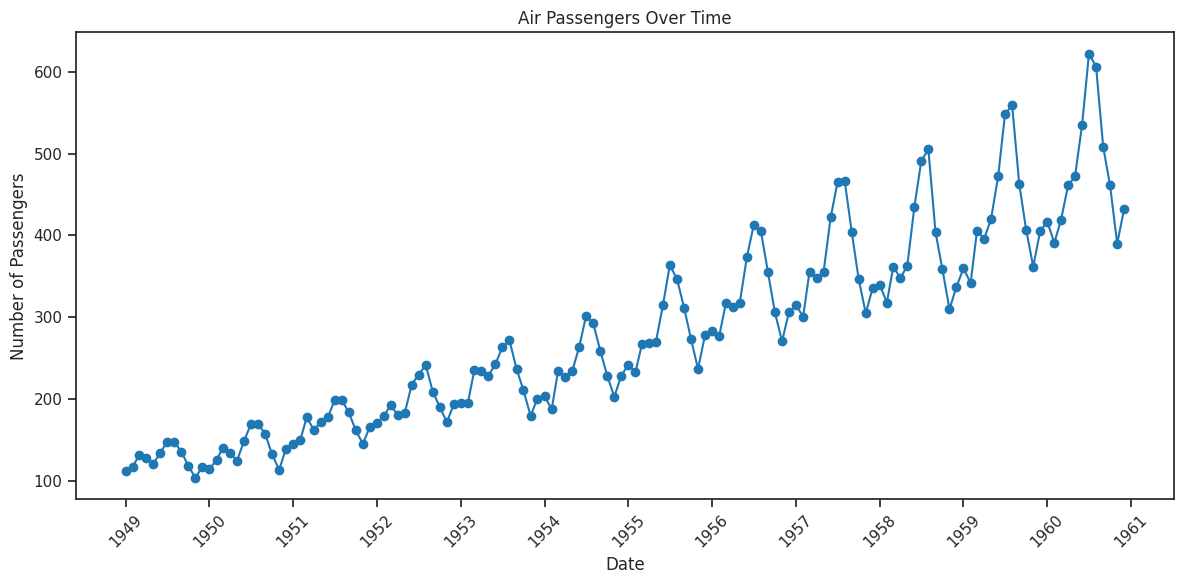

In [8]:
# better axis

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Number of Passengers'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Over Time')
plt.gca().xaxis.set_major_locator(mpl.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Your turn!

Please plot the "melsyd.csv" time series (total weekly air passenger numbers on Ansett airline flights between Melbourne and Sydney, 1987-1992).

<Axes: >

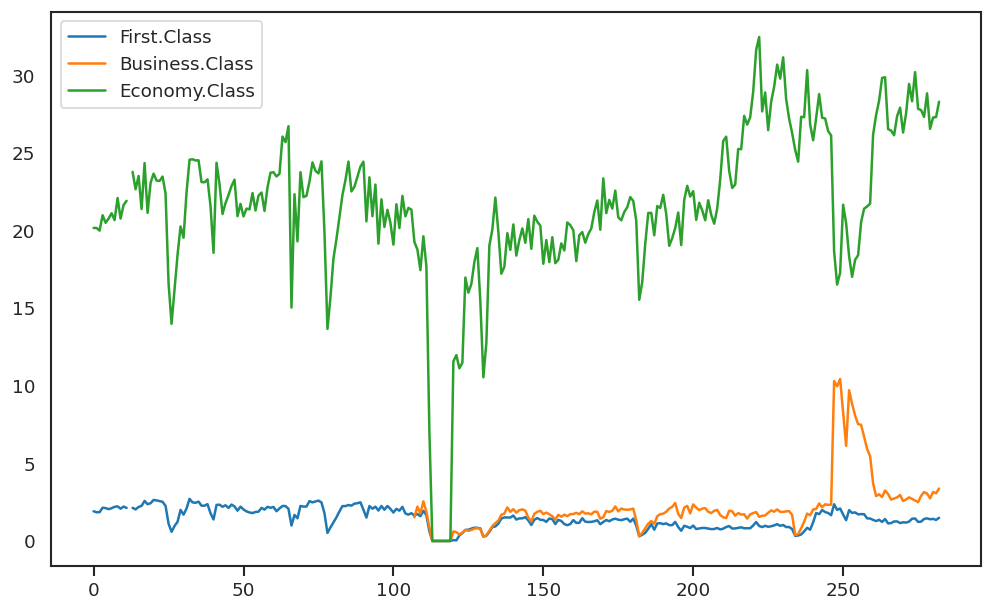

In [25]:
# Your code goes here!
df_melsyd = pd.read_csv("data/melsyd.csv")
df_melsyd = df_melsyd.dropna(how="all")
df_melsyd[df_melsyd.columns[1:]].plot()

Are time plots always the best? Look at this plot for half-hourly and daily electricity demand for Victoria, Australia, in 2014:

# **Patterns in a Time Series**

- Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**.


### **Trend**

- A **trend** is observed when there is an increasing or decreasing slope observed in the time series. 


### **Seasonality**

- A **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.


However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.


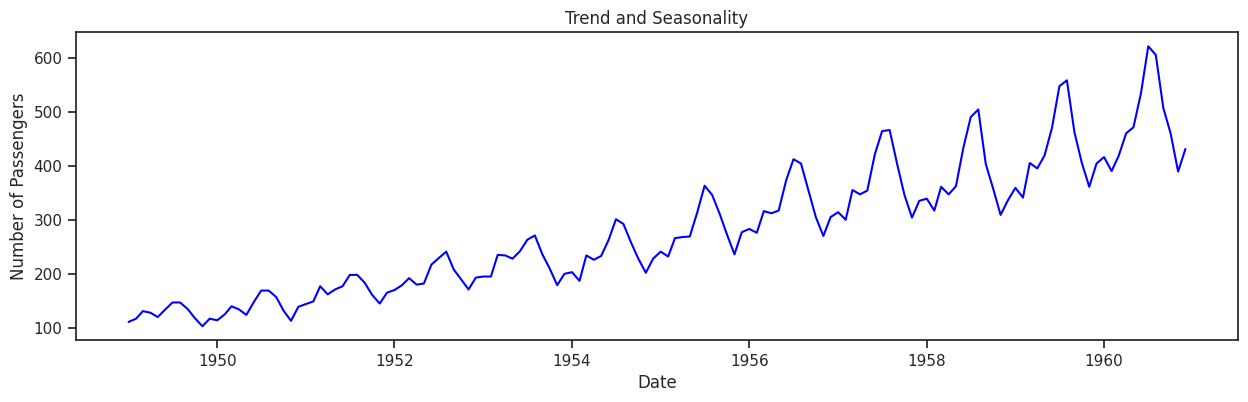

In [10]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['Date'], y=df['Number of Passengers'], title='Trend and Seasonality')

### **Cyclic behaviour**

- Another important thing to consider is the **cyclic behaviour**. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. We should not confuse 'cyclic' effect with 'seasonal' effect.

- If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## Seasonal or cyclic?

-   seasonal pattern constant length; cyclic pattern variable length
-   average length of cycle longer than length of seasonal pattern
-   magnitude of cycle more variable than magnitude of seasonal pattern

# **Additive and Multiplicative Time Series** 

- We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.


### **Additive time series:**

Value = Base Level + Trend + Seasonality + Error


### **Multiplicative Time Series:**

Value = Base Level x Trend x Seasonality x Error

# **Decomposition of a Time Series** 

- Decomposition of a time series can be performed by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual term.


- The seasonal_decompose in statsmodels implements this conveniently.

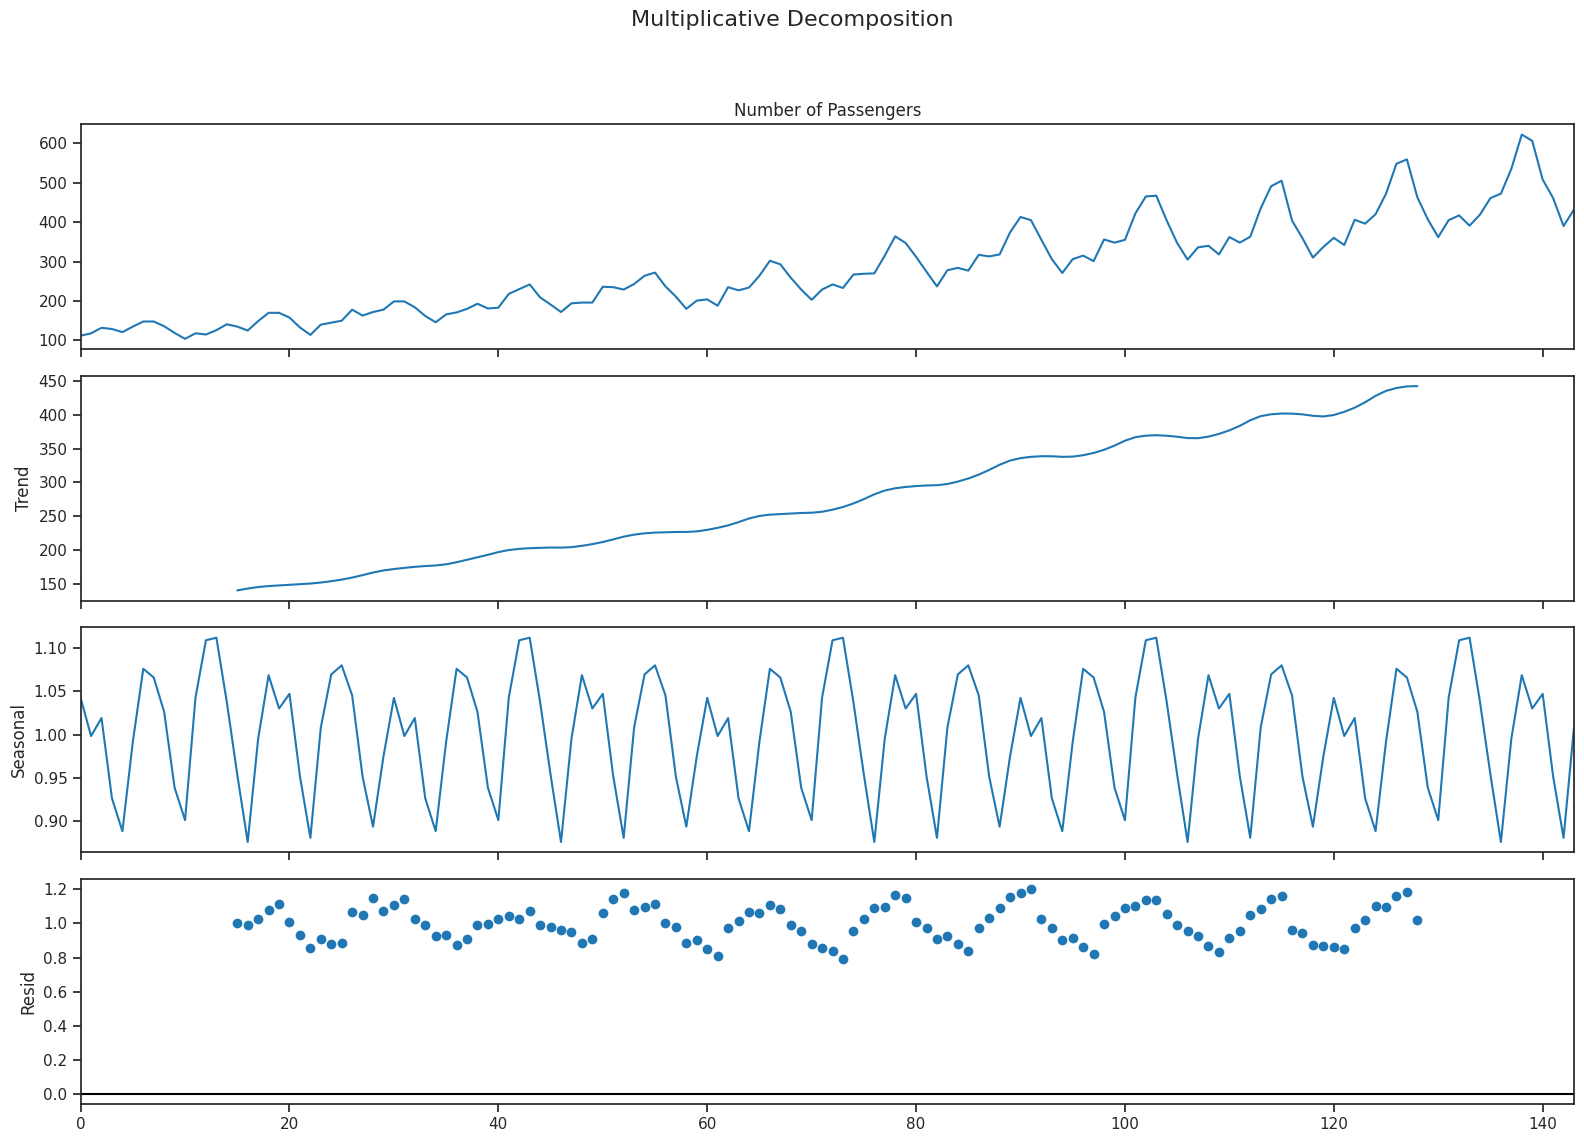

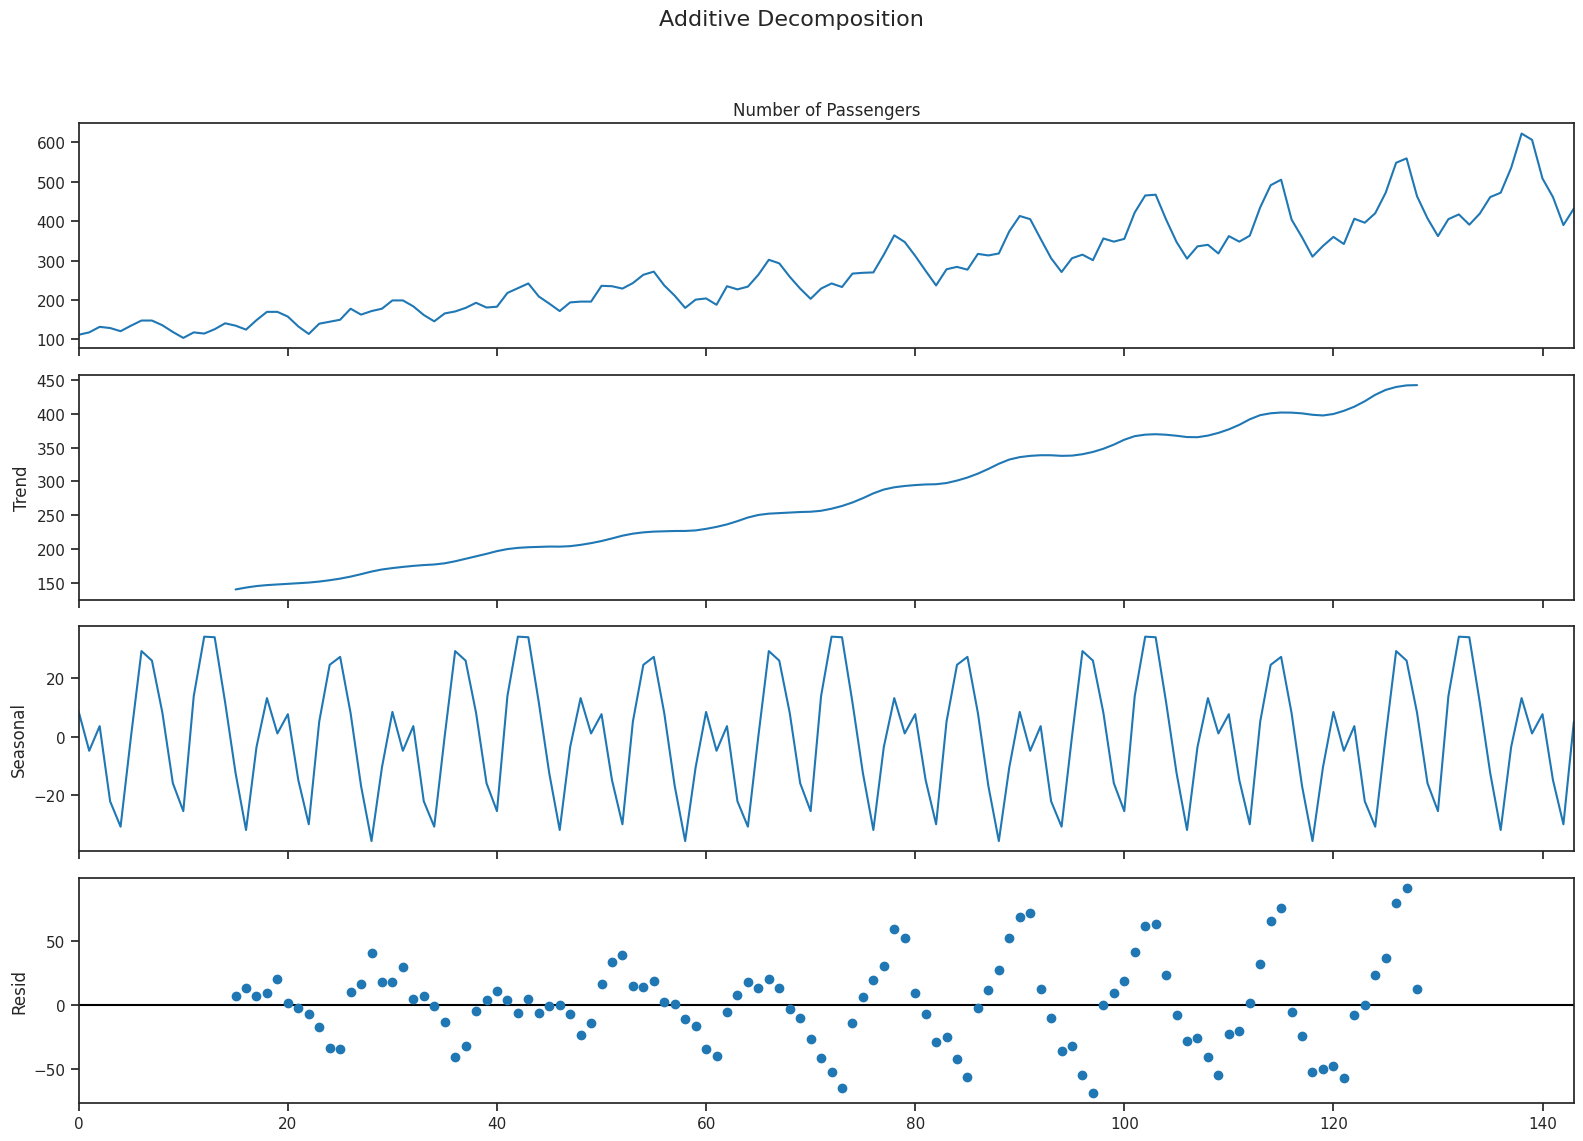

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

- If we look at the residuals of the additive decomposition closely, it has some pattern left over. 

- The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

# **Stationary and Non-Stationary Time Series** 


- Now, we wil discuss **Stationary and Non-Stationary Time Series**. **Stationarity** is a property of a time series. A stationary series is one where the values of the series is not a function of time. So, the values are independent of time.


- Hence the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values.


- A stationary time series is independent of seasonal effects as well.


- Now, we will plot some examples of stationary and non-stationary time series for clarity.

![Stationary and Non-Stationary Time Series](https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/stationary-and-non-stationary-time-series-865x569.png?ezimgfmt=ng:webp/ngcb1

- We can covert any non-stationary time series into a stationary one by applying a suitable transformation. Mostly statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

# **How to make a time series stationary?** 

- We can apply some sort of transformation to make the time-series stationary. These transformation may include:


1. Differencing the Series (once or more)
2. Take the log of the series
3. Take the nth root of the series
4. Combination of the above


- The most commonly used and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

## **Introduction to Differencing** 

- If Y_t is the value at time t, then the first difference of Y = Yt – Yt-1. In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

- If the first difference doesn’t make a series stationary, we can go for the second differencing and so on.


  - For example, consider the following series: [1, 5, 2, 12, 20]


  - First differencing gives: [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]


  - Second differencing gives: [-3-4, -10-3, 8-10] = [-7, -13, -2]

## **Reasons to convert a non-stationary series into stationary one before forecasting** 

There are reasons why we want to convert a non-stationary series into a stationary one. These are given below:


- Forecasting a stationary series is relatively easy and the forecasts are more reliable.


- An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.


- We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

# **How to test for stationarity?** 

- The stationarity of a series can be checked by looking at the plot of the series.

- Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

- There are several quantitative methods we can use to determine if a given series is stationary or not. This can be done using statistical tests called [Unit Root Tests](https://en.wikipedia.org/wiki/Unit_root). This test checks if a time series is non-stationary and possess a unit root. 

- There are multiple implementations of Unit Root tests like:


**1. Augmented Dickey Fuller test (ADF Test)**

**2. Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)**

**3. Philips Perron test (PP Test)**

# **Difference between white noise and a stationary series** 

- Like a stationary series, the white noise is also not a function of time. So, its mean and variance does not change over time. But the difference is that, the white noise is completely random with a mean of 0. In white noise there is no pattern.

- Mathematically, a sequence of completely random numbers with mean zero is a white noise.

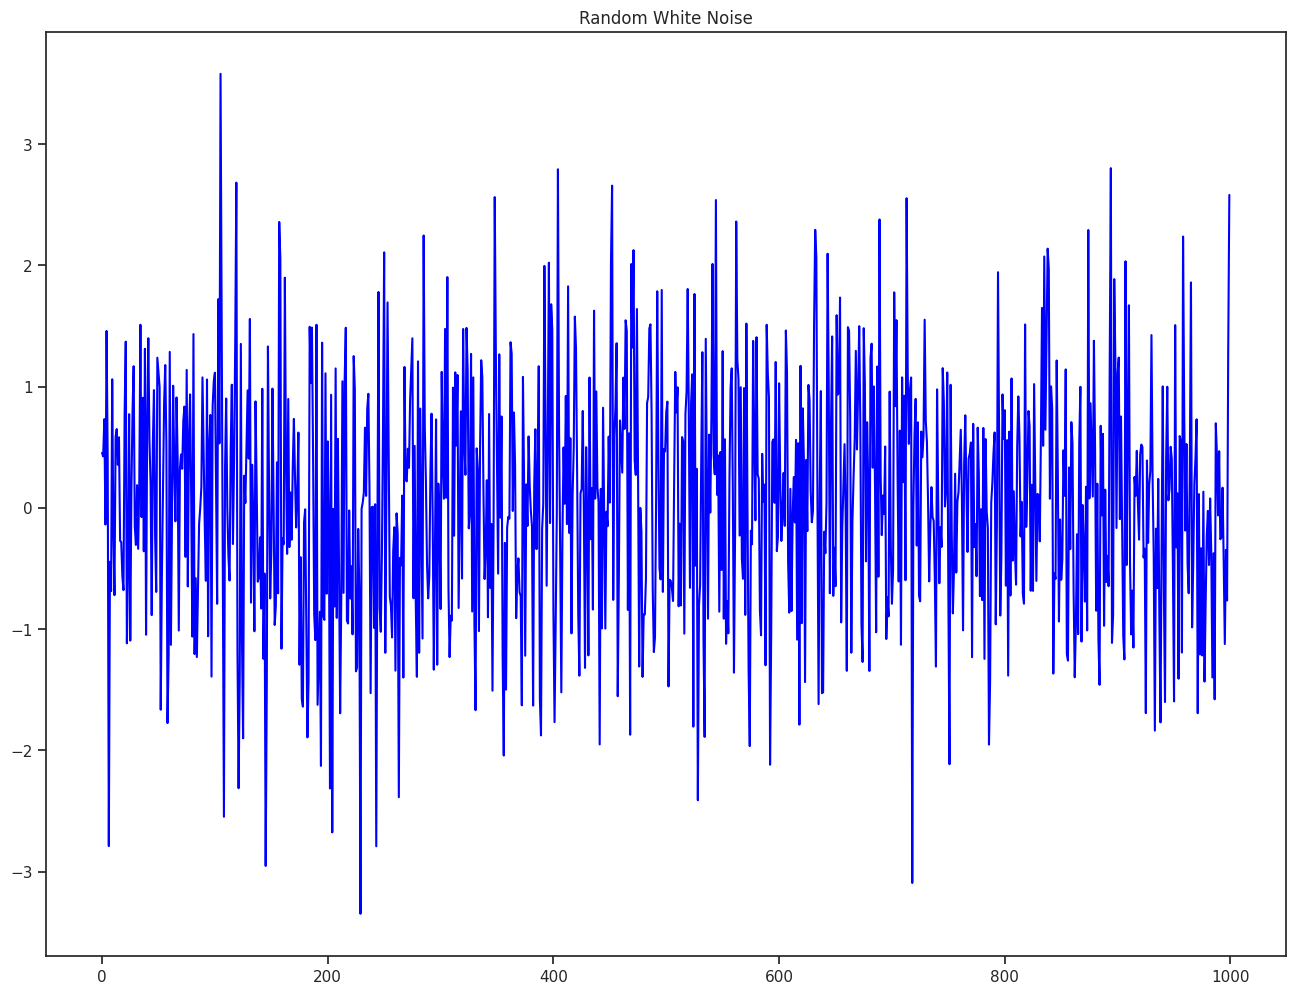

In [12]:
rand_numbers = np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise', color='b');

# **Detrend a Time Series** 

- Detrending a time series means to remove the trend component from the time series. There are multiple approaches of doing this as listed below:

1. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, we may want to use quadratic terms (x^2) in the model.

2. We subtract the trend component obtained from time series decomposition.

3. Subtract the mean.

4. Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.


Now, we will implement the first two methods to detrend a time series.

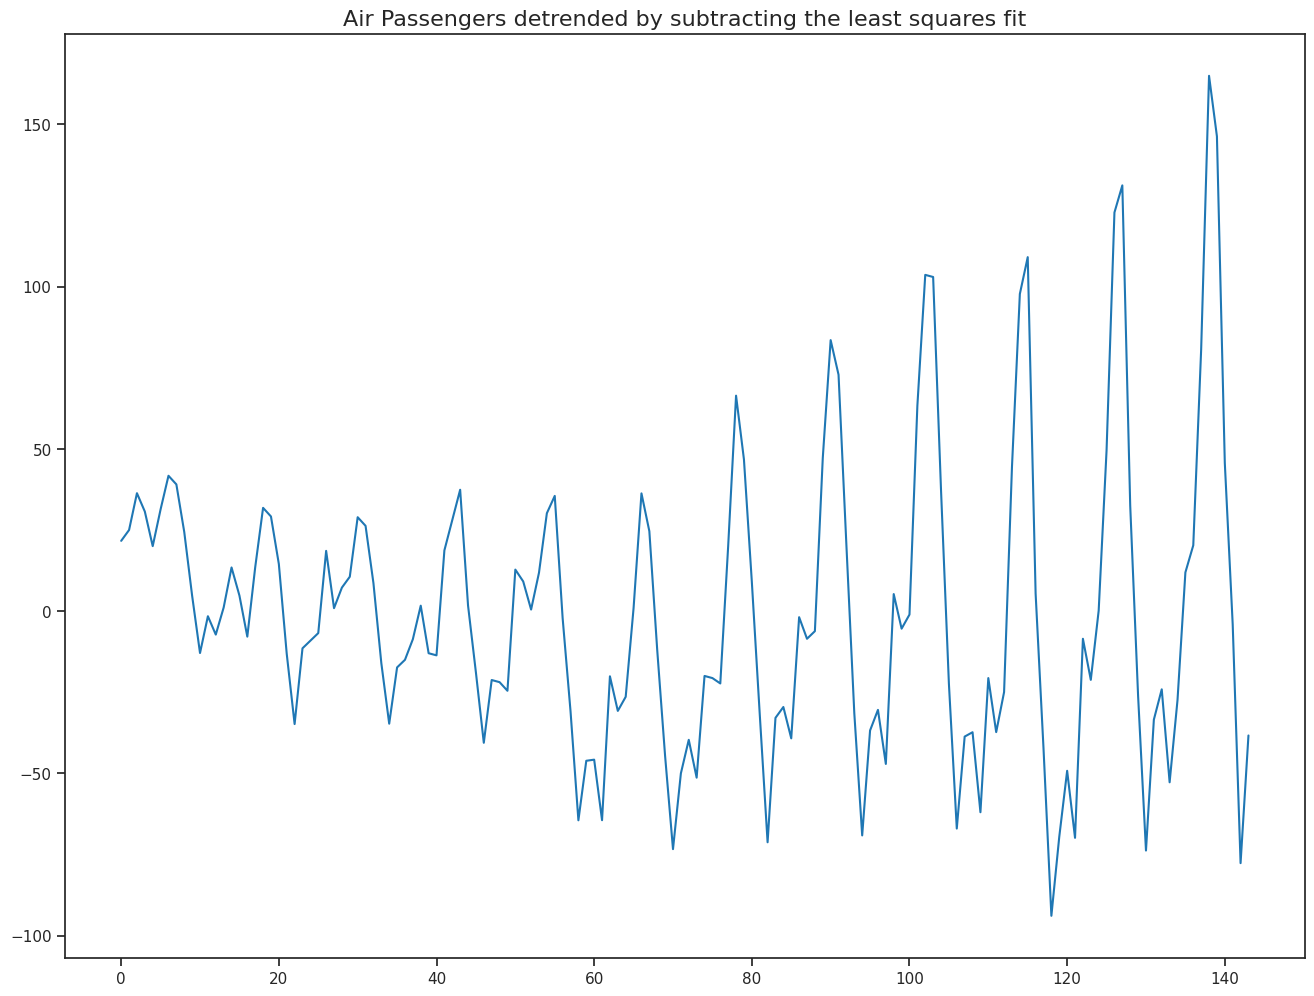

In [13]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended);
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16);

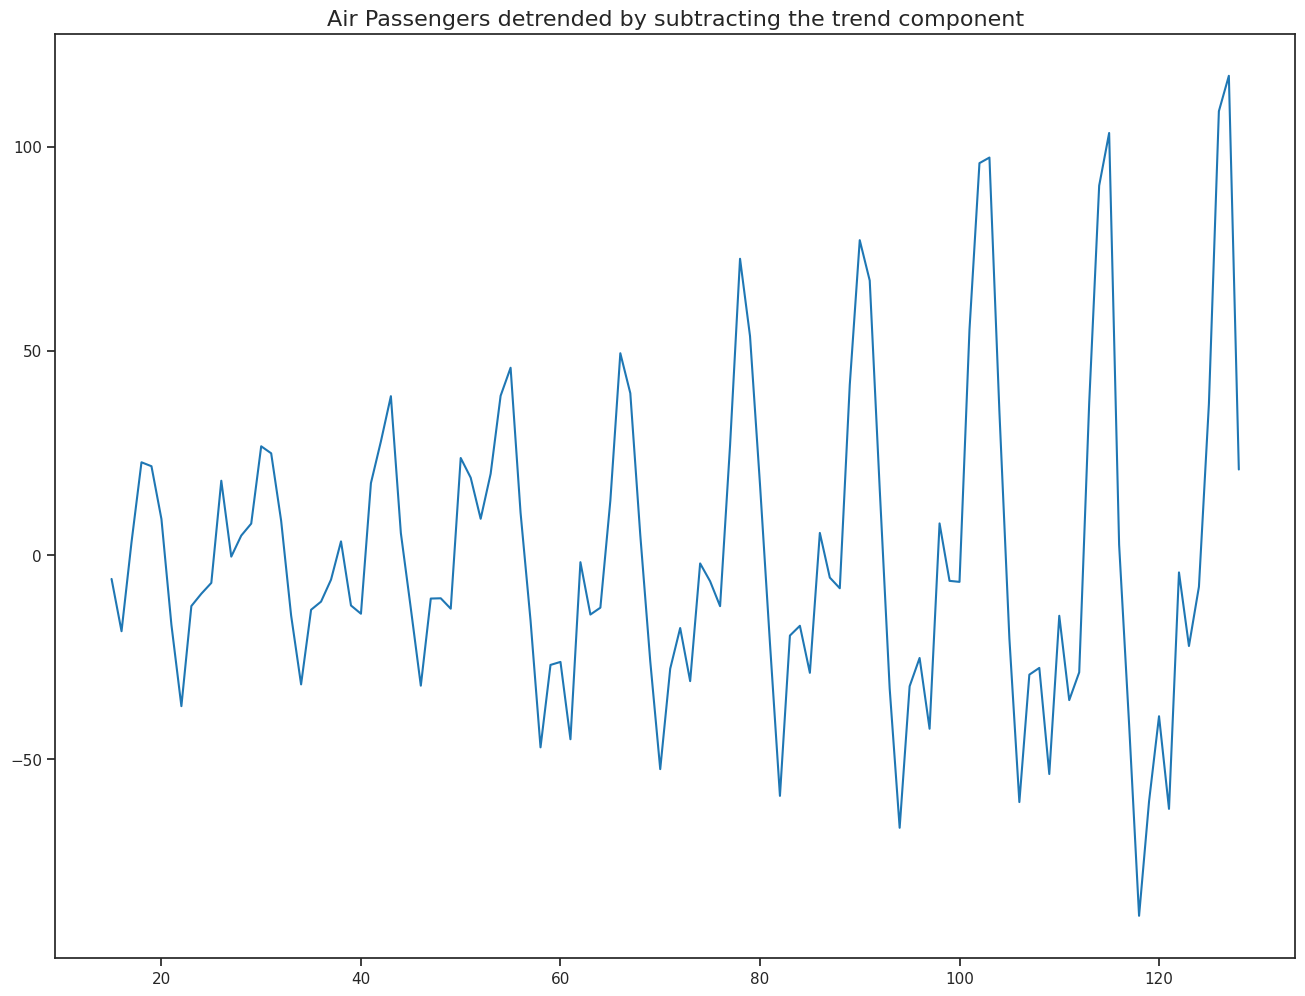

In [14]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)
detrended = df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended);
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16);

# **Deseasonalize a Time Series** 

There are multiple approaches to deseasonalize a time series. These approaches are listed below:


- 1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

- 2. Seasonal difference the series (subtract the value of previous season from the current value).

- 3. Divide the series by the seasonal index obtained from STL decomposition.

If dividing by the seasonal index does not work well, we will take a log of the series and then do the deseasonalizing. We will later restore to the original scale by taking an exponential.

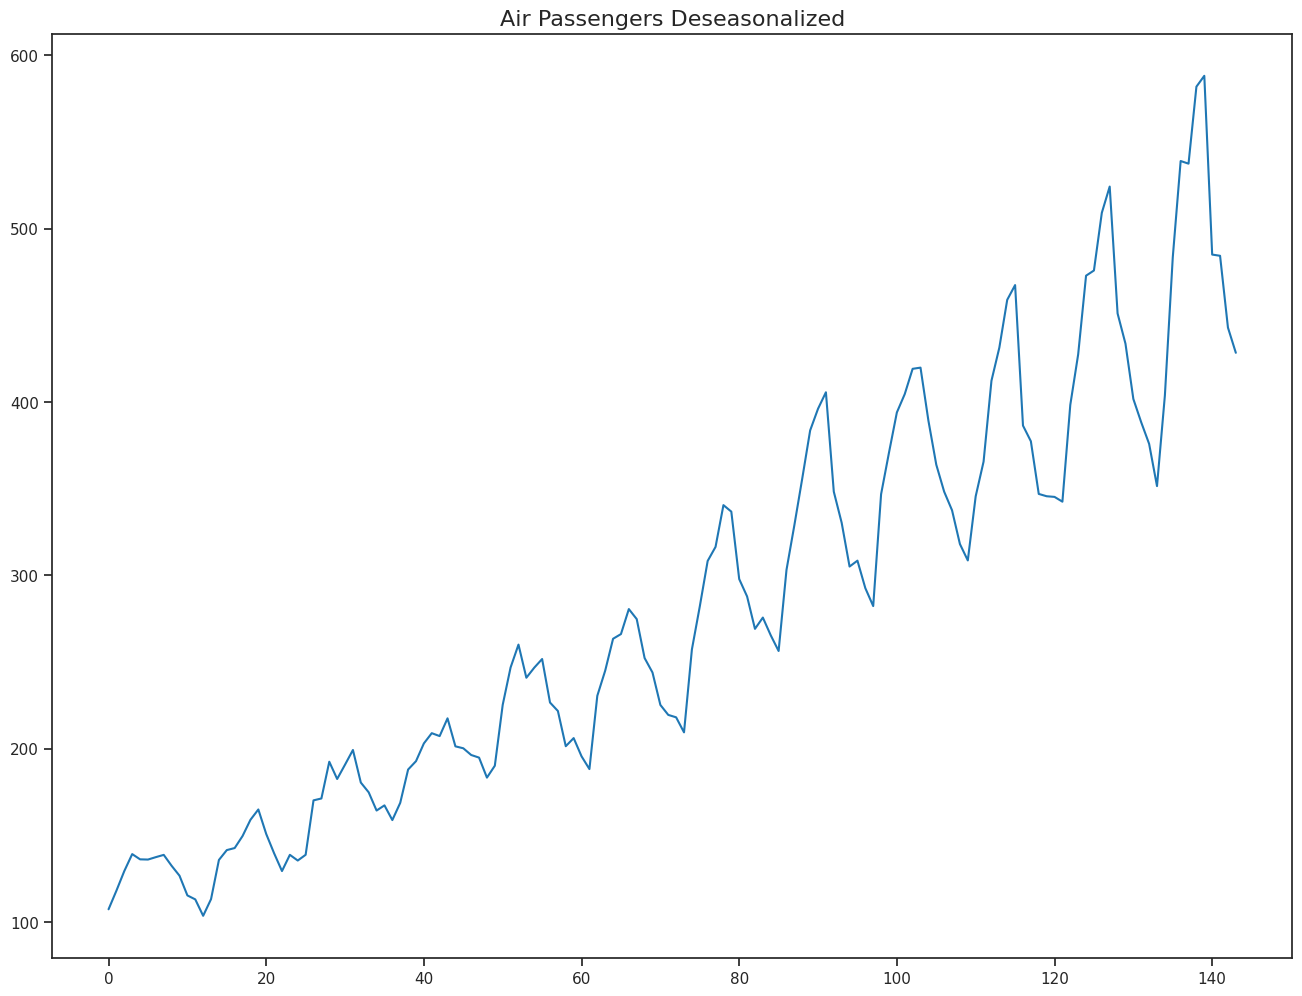

In [15]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot();

# **How to test for seasonality of a time series?** 

The common way to test for seasonality of a time series is to plot the series and check for repeatable patterns in fixed time intervals. So, the types of seasonality is determined by the clock or the calendar.

1. Hour of day
2. Day of month
3. Weekly
4. Monthly
5. Yearly

However, if we want a more definitive inspection of the seasonality, use the **Autocorrelation Function (ACF) plot**. There is a strong seasonal pattern, the ACF plot usually reveals definitive repeated spikes at the multiples of the seasonal window.

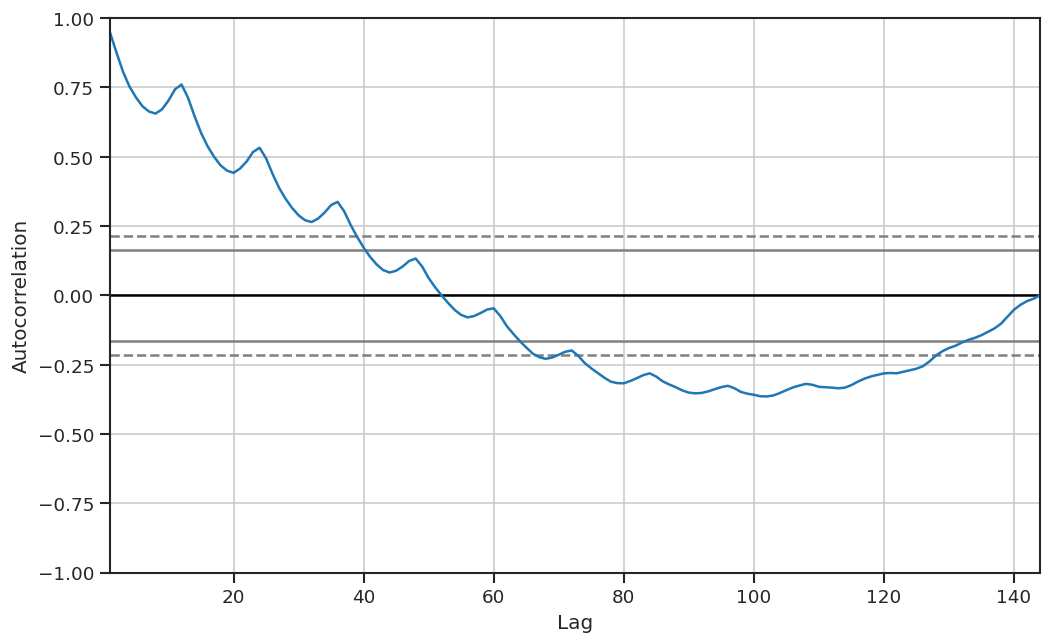

In [16]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120});
autocorrelation_plot(df['Number of Passengers'].tolist());

# **Autocorrelation and Partial Autocorrelation Functions** 

- **Autocorrelation** is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

- **Partial Autocorrelation** also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.
  
**Covariance** and **correlation**: measure extent of **linear relationship** between two variables ($y$ and $X$).

**Autocovariance** and **autocorrelation**: measure linear relationship between **lagged values** of a time series $y$.\pause

We measure the relationship between:

-   $y_{t}$ and $y_{t-1}$
-   $y_{t}$ and $y_{t-2}$
-   $y_{t}$ and $y_{t-3}$
-   etc.

## Autocorrelation

We denote the sample autocovariance at lag $k$ by $c_k$ and the sample
autocorrelation at lag $k$ by $r_k$. Then define

$ c_k = \frac{1}{T}\sum_{t=k+1}^T (y_t-\bar{y})(y_{t-k}-\bar{y}) $

$ r_k = \frac{c_k}{c_0} $

-   $r_1$ indicates how successive values of $y$ relate to each other
-   $r_2$ indicates how $y$ values two periods apart relate to each other
-   $r_k$ is almost the same as the sample correlation between
    $y_t$ and $y_{t-k}$.


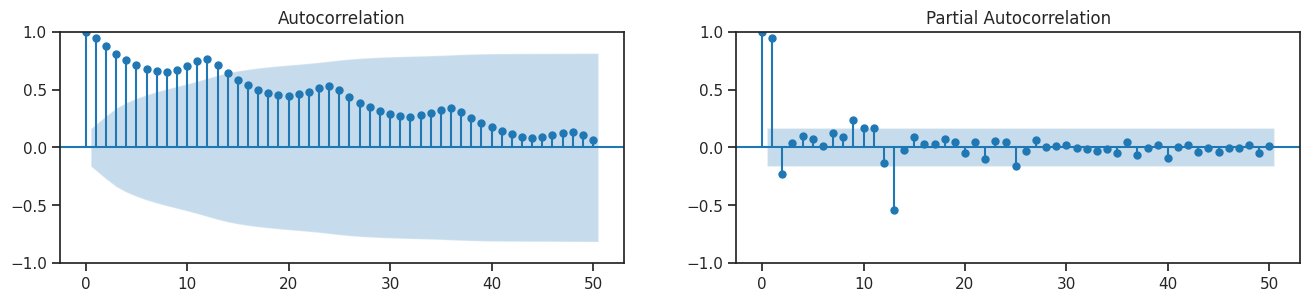

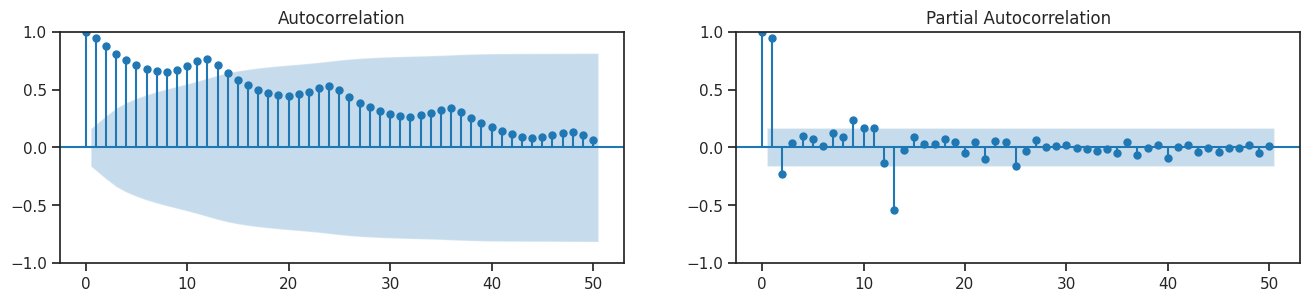

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Number of Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(), lags=50, ax=axes[1])

# **Computation of Partial Autocorrelation Function** 

- The partial autocorrelation function of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y. The autoregressive equation of Y is nothing but the linear regression of Y with its own lags as predictors.

- For example, if **Y_t** is the current series and **Y_t-1** is the lag 1 of Y, then the partial autocorrelation of **lag 3 (Y_t-3)** is the coefficient $\alpha_3$ of Y_t-3 in the following equation:

$$Y_t = \alpha_1 Y_{t-1} + \alpha_2 Y_{t-2} + \alpha_3 Y_{t-3} + \cdots + \alpha_k Y_{t-k} + e_t$$

where $Y_t$ is the current value, $Y_{t-1}$, $Y_{t-2}$, $\dots$, $Y_{t-k}$ are lagged values, $\alpha_1$, $\alpha_2$, $\ldots$, $\alpha_k$ are coefficients, and $e_t$ is the error term.


# **Lag Plots** 

- A **Lag plot** is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

-   Each graph shows $y_t$ plotted against $y_{t-k}$ for different
    values of $k$.
-   The autocorrelations are the correlations associated with these
    scatterplots.

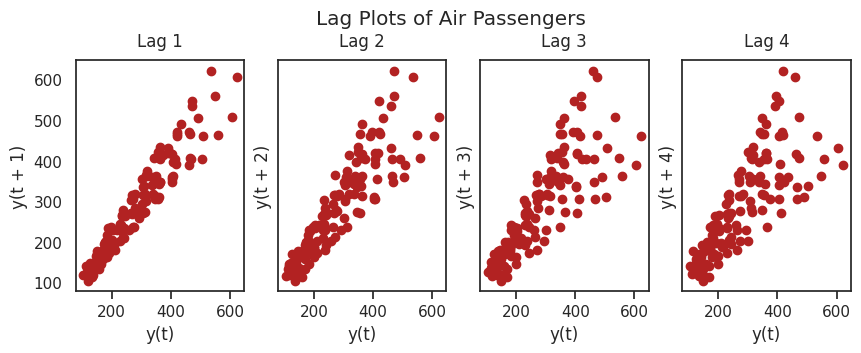

In [18]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

# **Smoothening a Time Series** 

Smoothening of a time series may be useful in the following circumstances:

- Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
- The smoothed version of series can be used as a feature to explain the original series itself.
- Visualize the underlying trend better.

We can smoothen a time series using the following methods:

- Take a moving average
- Do a LOESS smoothing (Localized Regression)
- Do a LOWESS smoothing (Locally Weighted Regression)

## Moving Average Smoothing

- **Moving average** is the average of a rolling window of defined width. We must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

### Moving Average Smoothing

Moving average smoothing is a simple and widely used technique for reducing short-term fluctuations and highlighting longer-term trends or cycles in time series data. The method replaces each data point with the average of neighboring points defined by a fixed-size window (the "rolling window").

**Formula:**  
For a window of size $k$, the moving average at time $t$ is:

$$
MA_t = \frac{1}{k} \sum_{i=-(m)}^{m} y_{t+i}
$$

where $k = 2m+1$ (for a centered window), and $y_{t}$ is the value at time $t$.


**How it works:**  
For a window of size $k$, each value is replaced by the mean of itself and the $k-1$ surrounding values. For example, with monthly data, a window size of 12 will smooth out seasonal effects and reveal the underlying trend.

**Advantages:**
- Reduces noise and random variation in the data.
- Makes it easier to identify trends and seasonal patterns.

**Disadvantages:**
- Can smooth out important changes or turning points.
- The choice of window size is crucial: too large a window may over-smooth the data, while too small a window may not remove enough noise.

### Example: Yahoo Finance data

We will be using the Yahoo Finance data to collect the data of Advanced Micro Devices, Inc(AMD) stock and model it with moving average model.

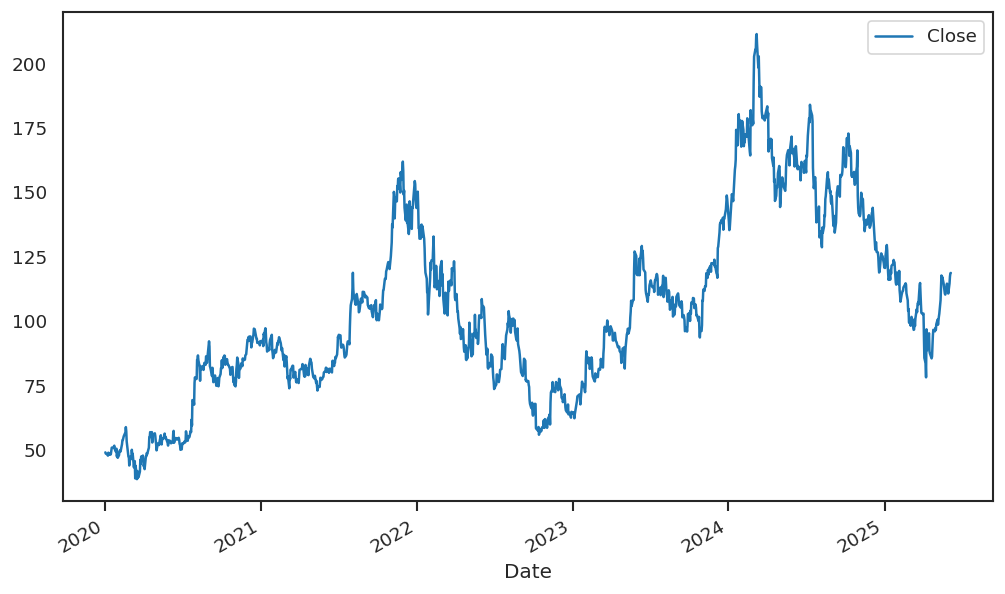

In [26]:
import yfinance as yf

AMD = yf.Ticker("AMD")

# getting the historical market data
AMD_values = AMD.history(start="2020-01-01")

# Plotting the close price of AMD
AMD_values[['Close']].plot();

Now in the next step the we will be calculating 10-day rolling average values of closing price and adding it as a new column named rolling_av, we are calculating the rolling average value of the closing data since it helps in smoothing out the fluctuations in the time series data, such that the data could be modelled and analyzed in a better way. After this step we will be plotting the closing value and the rolling average value of the data.

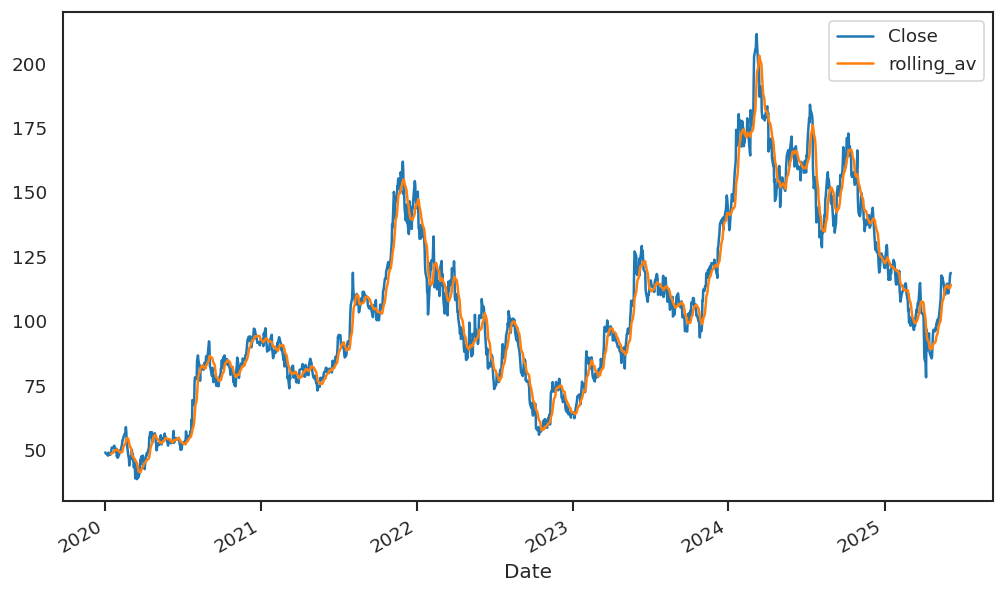

In [27]:
AMD_values['rolling_av'] = AMD_values['Close'].rolling(10).mean()

# plotting 10-day rolling average value with the closing value
AMD_values[['Close','rolling_av']].plot();

## Simple Exponential Smoothing

**Forecast equation:**

$ \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2} + \cdots $

where $0 \leq \alpha \leq 1$

---

**Weights assigned to observations for different $\alpha$:**

| Observation | $\alpha = 0.2$ | $\alpha = 0.4$ | $\alpha = 0.6$ | $\alpha = 0.8$ |
|-------------|:--------------:|:--------------:|:--------------:|:--------------:|
| $y_{T}$     | 0.2            | 0.4            | 0.6            | 0.8            |
| $y_{T-1}$   | 0.16           | 0.24           | 0.24           | 0.16           |
| $y_{T-2}$   | 0.128          | 0.144          | 0.096          | 0.032          |
| $y_{T-3}$   | 0.1024         | 0.0864         | 0.0384         | 0.0064         |
| $y_{T-4}$   | $(0.2)(0.8)^4$ | $(0.4)(0.6)^4$ | $(0.6)(0.4)^4$ | $(0.8)(0.2)^4$ |
| $y_{T-5}$   | $(0.2)(0.8)^5$ | $(0.4)(0.6)^5$ | $(0.6)(0.4)^5$ | $(0.8)(0.2)^5$ |

---

## Simple Exponential Smoothing (Component form)

**Equations:**

$ \hat{y}_{t+h|t} = \ell_{t} $

$ \ell_{t} = \alpha y_{t} + (1 - \alpha)\ell_{t-1} $

- $\ell_t$ is the level (or the smoothed value) of the series at time $t$.
- $ \hat{y}_{t+1|t} = \alpha y_t + (1-\alpha) \hat{y}_{t|t-1} $

Iterating gives the exponentially weighted moving average form:

$ \hat{y}_{T+1|T} = \sum_{j=0}^{T-1} \alpha(1-\alpha)^j y_{T-j} + (1-\alpha)^T \ell_{0} $

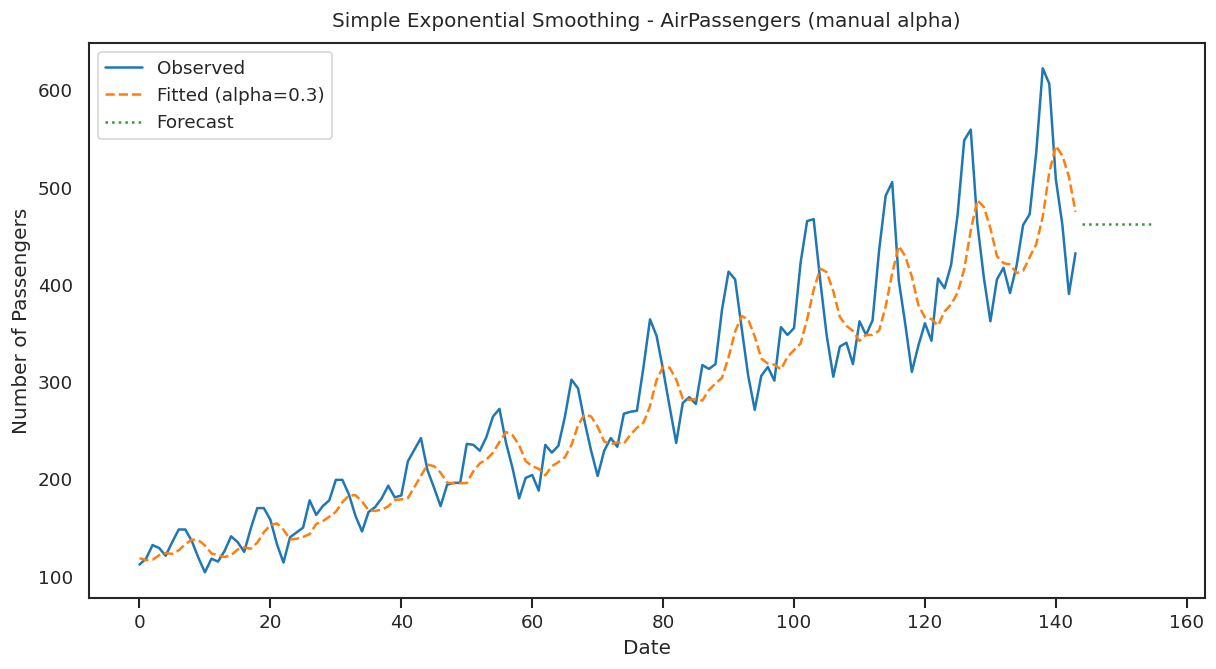

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

alpha = 0.3  # You can change this value between 0 and 1

model = ExponentialSmoothing(df['Number of Passengers'], trend=None, seasonal=None)
fit = model.fit(smoothing_level=alpha, optimized=False)  # optimized=False to use manual alpha

# Forecast the next 12 months
forecast = fit.forecast(12)

plt.figure(figsize=(12,6))
plt.plot(df['Number of Passengers'], label='Observed')
plt.plot(fit.fittedvalues, label=f'Fitted (alpha={alpha})', linestyle='--')
plt.plot(forecast, label='Forecast', linestyle=':')
plt.title('Simple Exponential Smoothing - AirPassengers (manual alpha)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

The forecast is a flat line extending from the latest smoothed value. It assumes future values will stay the same as the most recent observation.

# Trend methods

## Holt's linear trend

**Component form:**

$$
\begin{align*}
\text{Forecast:} \quad & \hat{y}_{t+h|t} = \ell_{t} + h b_{t} \\
\text{Level:} \quad & \ell_{t} = \alpha y_{t} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
\text{Trend:} \quad & b_{t} = \beta^* (\ell_{t} - \ell_{t-1}) + (1 - \beta^*) b_{t-1}
\end{align*}
$$

- Two smoothing parameters: $\alpha$ and $\beta^*$ ($0 \leq \alpha, \beta^* \leq 1$).
- $\ell_t$ (level): weighted average between $y_t$ and the one-step-ahead forecast for time $t$, $(\ell_{t-1} + b_{t-1} = \hat{y}_{t|t-1})$.
- $b_t$ (slope): weighted average of $(\ell_{t} - \ell_{t-1})$ and $b_{t-1}$, the current and previous estimate of the slope.
- Choose $\alpha, \beta^*, \ell_0, b_0$ to minimize SSE (sum of squared errors).

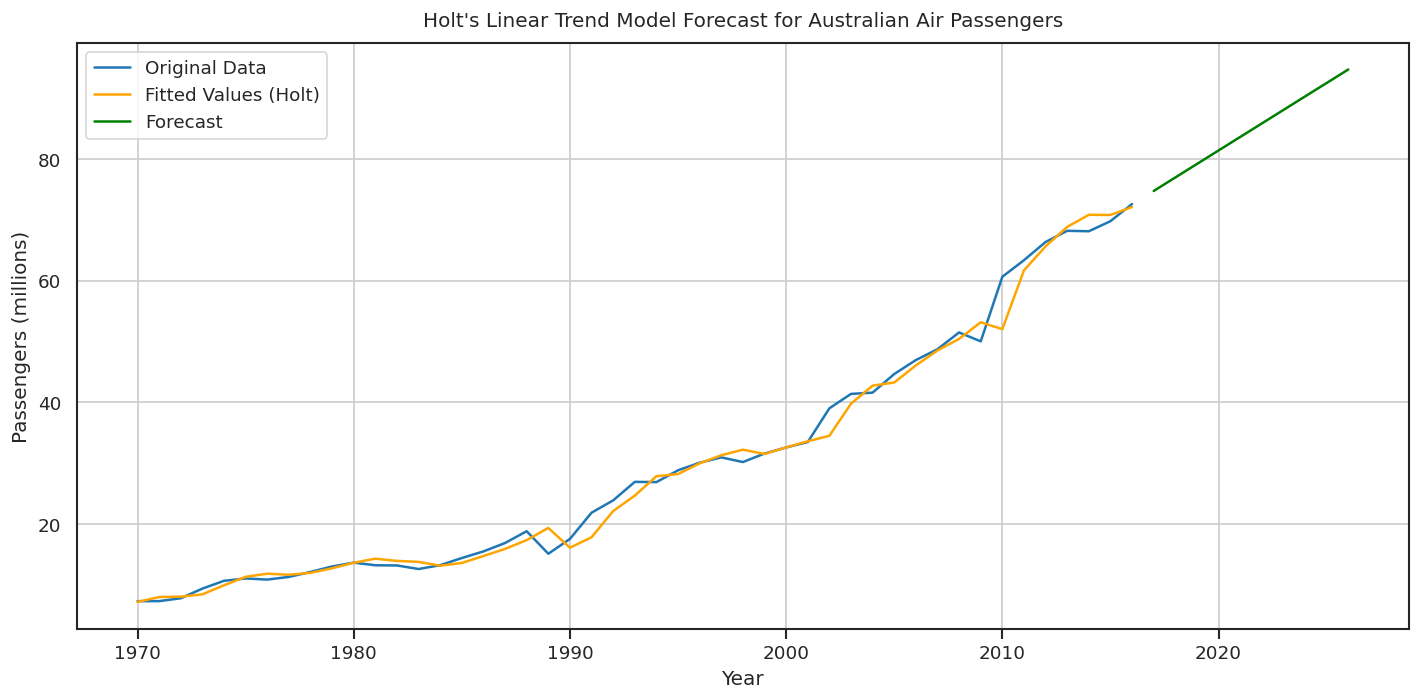

In [29]:
ausair = pd.read_csv('data/ausair.csv')

# Convert 'time' to datetime and set as index
ausair['year'] = pd.to_datetime(ausair['time'], format='%Y')
ausair.set_index('year', inplace=True)
ausair = ausair.asfreq('YS')  # Set frequency explicitly to Year Start

# Fit Holt's Linear Trend Model
holt_model = ExponentialSmoothing(ausair['value'], trend='add', seasonal=None).fit()

# Forecast for next 10 years
forecast_holt = holt_model.forecast(10)

# Create forecast index
forecast_index = pd.date_range(start=ausair.index[-1] + pd.DateOffset(years=1), periods=10, freq='YS')
forecast_series = pd.Series(forecast_holt, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(ausair['value'], label='Original Data')
plt.plot(holt_model.fittedvalues, label='Fitted Values (Holt)', color='orange')
plt.plot(forecast_series, label='Forecast', color='green')
plt.title("Holt's Linear Trend Model Forecast for Australian Air Passengers")
plt.xlabel('Year')
plt.ylabel('Passengers (millions)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Holt’s Linear Trend Model creates a forecast line that includes both the smoothed level and the trend. The forecast line slopes based on the recent trend direction. It adjusts over time, reflecting the trend’s direction.

# Seasonal methods

## Holt-Winters additive method

Holt and Winters extended Holt's method to capture seasonality.

### Component form

$$
\begin{align*}
\hat{y}_{t+h|t} &= \ell_{t} + h b_{t} + s_{t+h-m(k+1)} \\
\ell_{t} &= \alpha(y_{t} - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
b_{t} &= \beta^*(\ell_{t} - \ell_{t-1}) + (1 - \beta^*)b_{t-1} \\
s_{t} &= \gamma (y_{t} - \ell_{t-1} - b_{t-1}) + (1-\gamma)s_{t-m}
\end{align*}
$$

- $k$ = integer part of $(h-1)/m$. Ensures estimates from the final year are used for forecasting.
- Parameters: $0\le \alpha\le 1$, $0\le \beta^*\le 1$, $0\le \gamma\le 1-\alpha$ and $m$ = period of seasonality (e.g. $m=4$ for quarterly data).

## Holt-Winters additive method

- The seasonal component is usually expressed as  
  $s_{t} = \gamma^* (y_{t} - \ell_{t}) + (1 - \gamma^*) s_{t-m}.$
- Substitute in for $\ell_t$:  
  $s_{t} = \gamma^* (1 - \alpha) (y_{t} - \ell_{t-1} - b_{t-1}) + [1 - \gamma^* (1 - \alpha)] s_{t-m}$
- We set $\gamma = \gamma^* (1 - \alpha)$.
- The usual parameter restriction is $0 \leq \gamma^* \leq 1$, which translates to $0 \leq \gamma \leq (1 - \alpha)$.

 ## Holt-Winters multiplicative method

For cases where seasonal variations change proportionally to the level of the series.

### Component form

$$
\begin{align*}
\hat{y}_{t+h|t} &= (\ell_{t} + h b_{t}) s_{t+h-m(k+1)} \\
\ell_{t} &= \alpha \frac{y_{t}}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
b_{t} &= \beta^* (\ell_{t} - \ell_{t-1}) + (1 - \beta^*) b_{t-1} \\
s_{t} &= \gamma \frac{y_{t}}{\ell_{t-1} + b_{t-1}} + (1 - \gamma) s_{t-m}
\end{align*}
$$

- $k$ is the integer part of $(h-1)/m$.
- In the additive method, $s_t$ is in absolute terms: within each year $\sum_i s_i \approx 0$.
- In the multiplicative method, $s_t$ is in relative terms: within each year $\sum_i s_i \approx m$.

The code applies the Holt-Winters model with both additive trend and seasonality to the data. It fits the model and forecasts the next 10 periods.

### Example: NSW Retail turnover

Now we are going to work with the Australian retail turnover series:

In [31]:
data = pd.read_csv('data/nswretail.csv', index_col='Month', parse_dates=True, dayfirst=True)
data.tail()

,Turnover
Month,
2018-05-01,8438.3
2018-06-01,8354.4
2018-07-01,8304.6
2018-08-01,8474.8
2018-09-01,8387.7


In [32]:
y = data['Turnover'].copy()
y.index = y.index.to_period(freq='M')

ts = data['Turnover']

In [33]:
data.describe().round(2)

,Turnover
count,438.00
mean,4335.57
std,2164.08
min,1214.50
25%,2566.80
50%,3930.70
75%,5986.15
max,10960.70


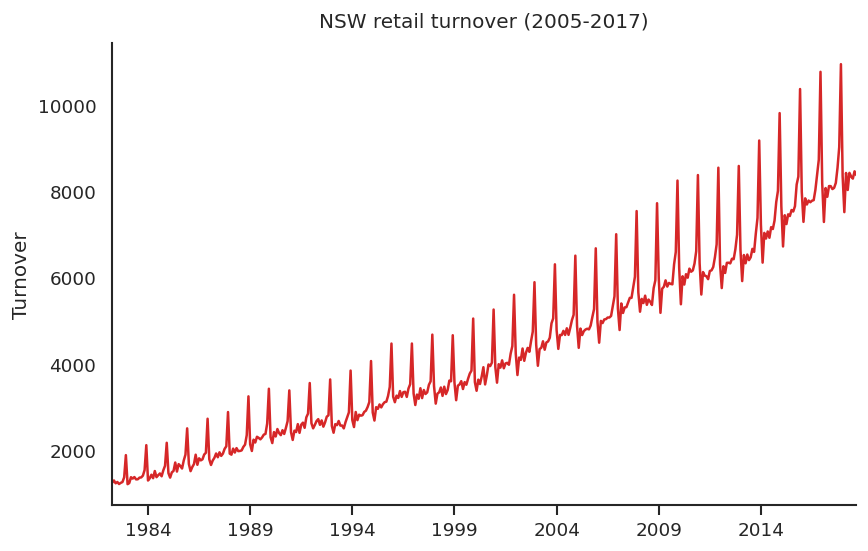

In [34]:
fig, ax= plt.subplots(figsize=(8,5))
y.plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Turnover')
ax.set_title('NSW retail turnover (2005-2017)')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

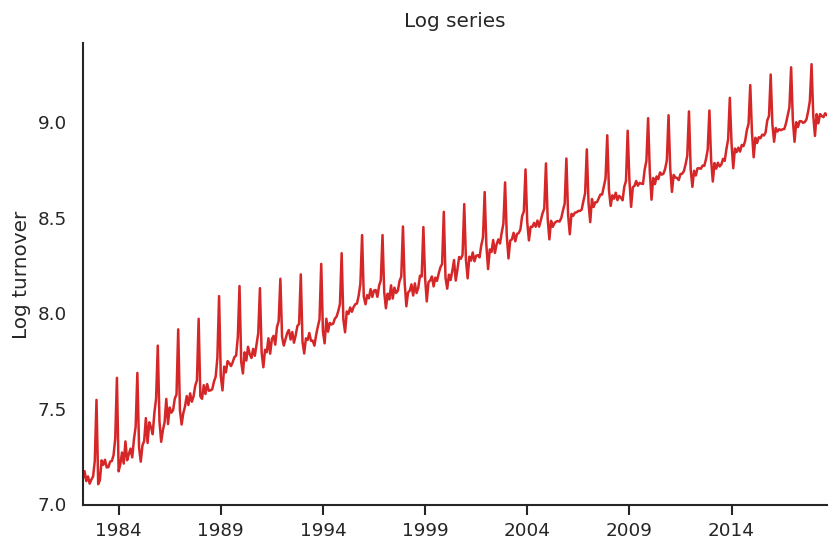

In [35]:
fig, ax= plt.subplots(figsize=(8,5))
np.log(y).plot(color=red)
ax.set_xlabel('')
ax.set_ylabel('Log turnover')
ax.set_title('Log series')
ax.set_xticks([], minor=True)
sns.despine()
plt.show()

/home/mauzer/.venvs/global/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


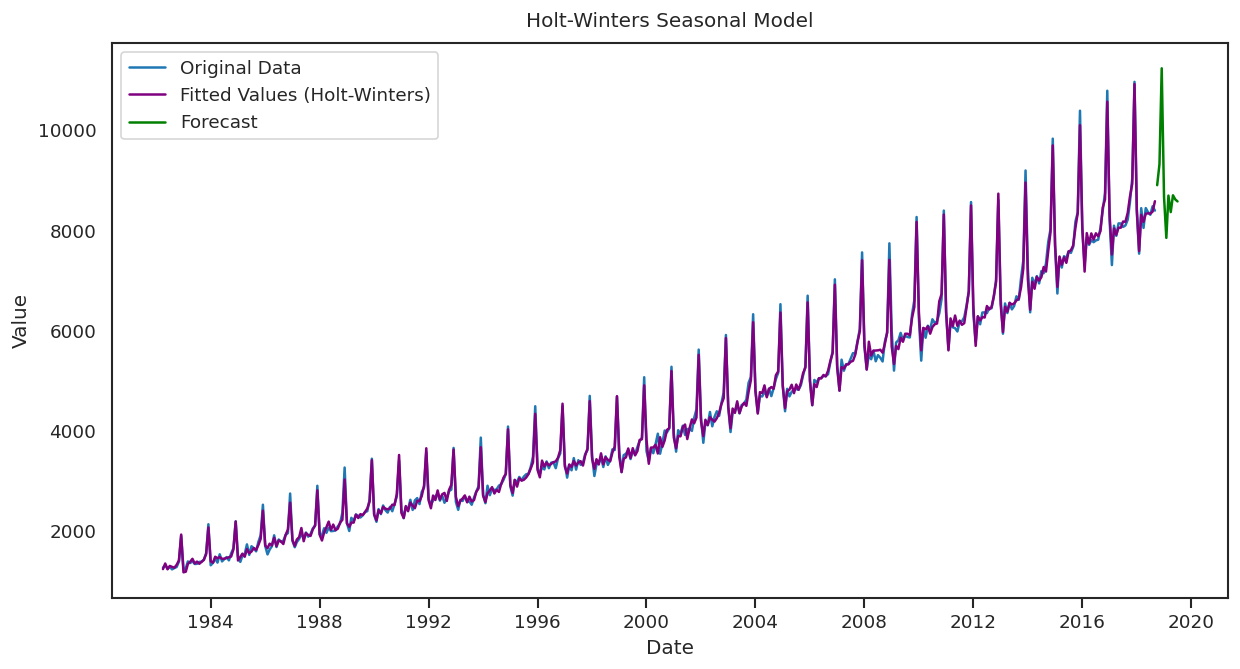

In [36]:
# Apply Holt-Winters Seasonal Model
holt_winters_model = ExponentialSmoothing(data['Turnover'], trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast for the next 10 periods
forecast_hw = holt_winters_model.forecast(10)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Turnover'], label='Original Data')
plt.plot(holt_winters_model.fittedvalues, label='Fitted Values (Holt-Winters)', color='purple')
plt.plot(forecast_hw, label='Forecast', color='green')
plt.title("Holt-Winters Seasonal Model")
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

The Holt-Winters Seasonal Model creates a forecast line by combining the smoothed level, trend, and seasonal patterns. The line projects future values and includes regular seasonal fluctuations along with the overall trend. This forecast line shows both the trend direction and periodic seasonal changes.

Exponential Smoothing helps make time series data clearer by highlighting recent trends. Using Python, you can apply this technique to smooth your data and improve predictions. It’s a straightforward way to better understand and forecast your time series data.

# In-class assignment!

Load the time series "hsales.csv" (Sales of New One-Family Houses (1987-1996)). Plot it and discuss the patterns. Decompose it. Discuss stationarity.

Perform the ACF and PACF analysis. Interpret it.

Plot the smoothed time series and perform the simple forecasting.

In [41]:
df_sales = pd.read_csv("data/hsales.csv")
df_sales

,rownames,time,value
0,1,1987.000000,53
1,2,1987.083333,59
2,3,1987.166667,73
3,4,1987.250000,72
4,5,1987.333333,62
...,...,...,...
102,103,1995.500000,64
103,104,1995.583333,63
104,105,1995.666667,55
105,106,1995.750000,54


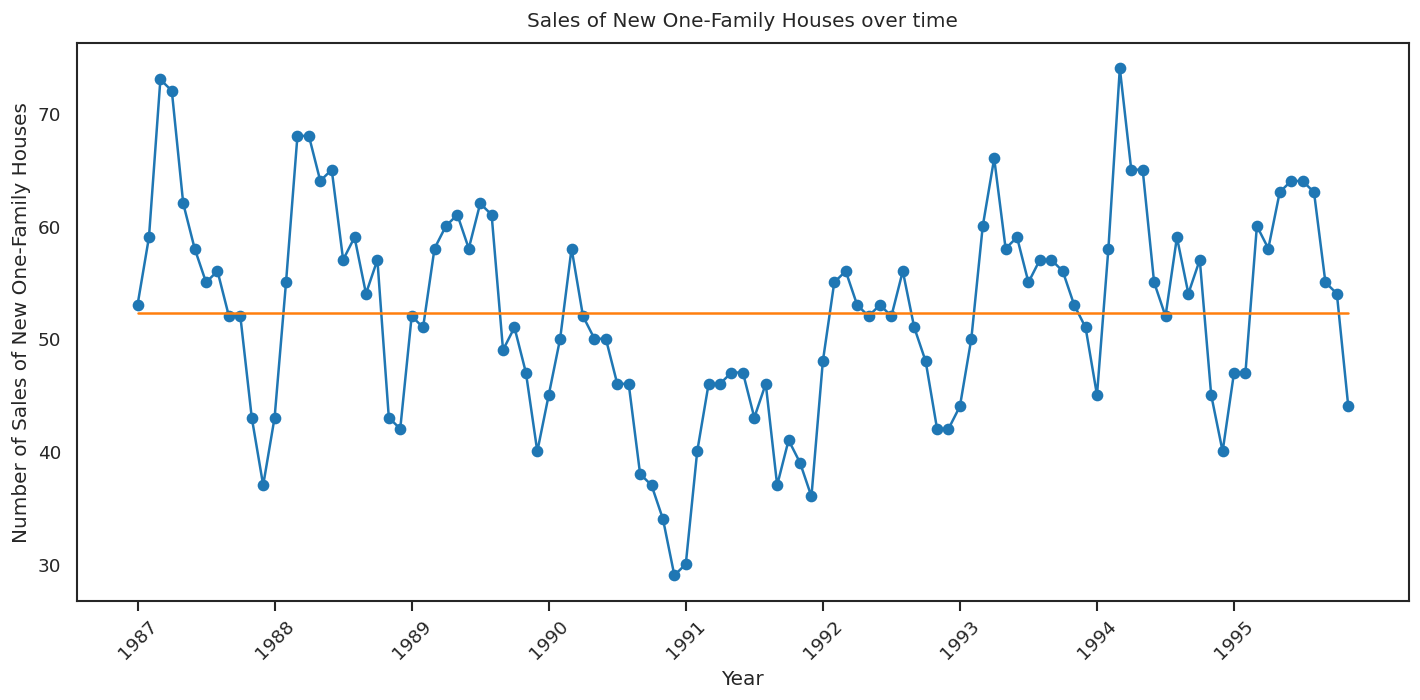

In [49]:
df = df_sales
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['value'], marker='o')
value_mean = df['value'].mean()
plt.plot(df["time"], [value_mean for _ in df["value"]])
plt.xlabel('Year')
plt.ylabel('Number of Sales of New One-Family Houses')
plt.title('Sales of New One-Family Houses over time')
plt.xticks(rotation=45, ticks=list(set(int(x) for x in df["time"])))
plt.tight_layout()
plt.show()

Data is seasonal, at the begining of the year there is a significant drop

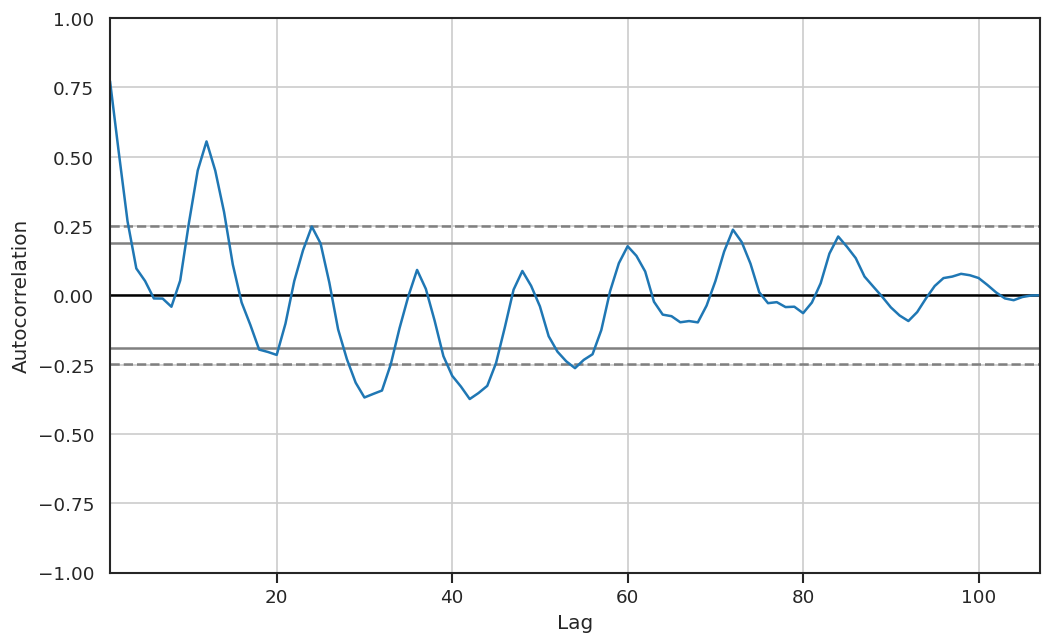

In [51]:
# Perform the ACF and PACF analysis. Interpret it.
autocorrelation_plot(df['value'].tolist());

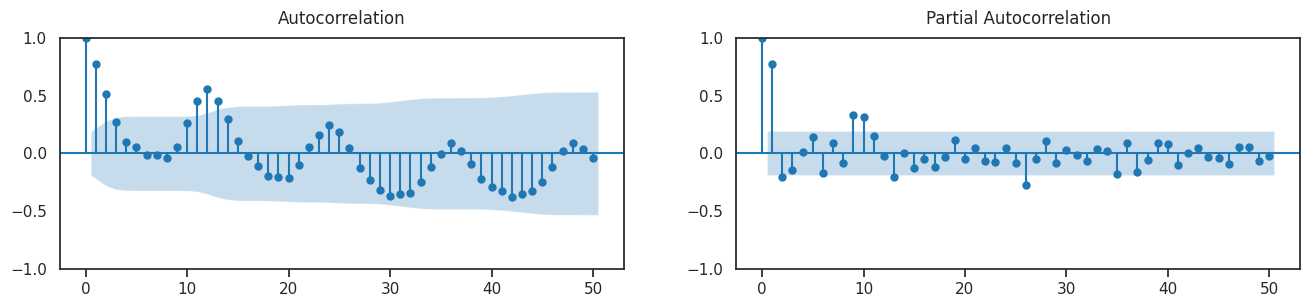

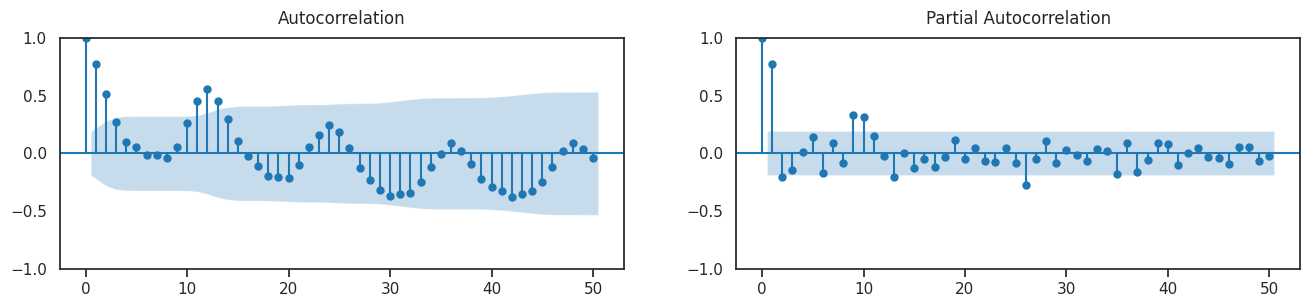

In [52]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['value'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['value'].tolist(), lags=50, ax=axes[1])

These plots clearly show a non-stationary time series with both a strong trend and strong 12-period seasonality

## Extra credits - team assignment

Apply ARIMA modeling for this time series (hsales) /do it after 2 lectures with presentations about ARIMA models/.